# The Experiment

Train a hanful of neural networks to spit out color chanels based on coordinates

In [1]:
# libraries used
import numpy as np
from PIL import Image
import network_numpy as nn
from random import shuffle
print(nn.__doc__)

netwprk.py
the main module that handles the neural networks
utilizes numpy for now



## The Data

![DataSet](DataSet.png)

In [2]:
#importing the image into a dataset
imobj = Image.open(".\\Dataset.png")
imarr = np.asarray(imobj)
print(imarr.shape)
dataset = []
for x in range(imarr.shape[0]):
    for y in range(imarr.shape[1]):
        xnorm = x/imarr.shape[0]
        ynorm = y/imarr.shape[1]
        coords = (xnorm,ynorm)
        color = []
        for chan in range(imarr.shape[2]):
            color.append(imarr[x][y][chan]/255)
        color=tuple(color)
        pair = (coords,color)
        dataset.append(pair)
print(len(dataset))
print(imarr.shape[0]*imarr.shape[1])
shuffle(dataset)
# use about 20% of dataset for testing, 80% for training
test_size = len(dataset)//5
print(dataset[0])
train = dataset[:-test_size]
test = dataset[-test_size:]
print(len(train),len(test))

(225, 400, 3)
90000
90000
((0.5733333333333334, 0.1375), (1.0, 0.4980392156862745, 0.15294117647058825))
72000 18000


In [3]:
# a function to reconstruct the image via the net
def NetImage(net):
    if type(net) is not nn.NeuralNet:
        raise TypeError("Unexpected type")
    newimarr = np.zeros(imarr.shape,dtype=np.uint8)
    for x in range(imarr.shape[0]):
        for y in range(imarr.shape[1]):
            xnorm = x/imarr.shape[0]
            ynorm = y/imarr.shape[1]
            coords = (xnorm,ynorm)
            color = net.Classify(coords)
            for chan in range(imarr.shape[2]):
                chancol = 0
                try:
                    chancol = round(color[chan]*255)
                except:
                    chancol = 0
                if chancol < 0:
                    chancol = 0
                elif chancol > 255:
                    chancol = 255
                newimarr[x][y][chan] = chancol
    return Image.fromarray(newimarr)

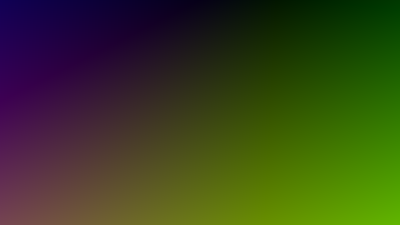

In [4]:
# testing the new thing
fakenet = nn.NeuralNet(2,3)
fakeim = NetImage(fakenet)
display(fakeim)

## The Networks

In [5]:
# some global facts for net building and training
inps = 2
outs = 3
epochs = 100
alpha = 0.1

Reference

![ref](netdrawings\networks-Ref.png)

### Net 1

Just a collection of linear regressors

![net1](netdrawings\networks-net1.png)

In [6]:
# implementation and training
net1 = nn.NeuralNet(inps,outs)
nn.TrainNet(net1,train,epochs,alpha)

Begining training
Starting epoch 10...
Starting epoch 20...
Starting epoch 30...
Starting epoch 40...
Starting epoch 50...
Starting epoch 60...
Starting epoch 70...
Starting epoch 80...
Starting epoch 90...
Done in 2.0 minutes and 7.12 seconds


In [7]:
net1_cost = nn.TestNet(net1,test)
print(net1_cost)

0.06926849477652089


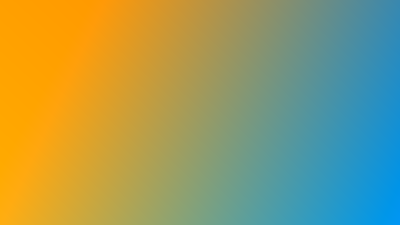

In [8]:
net1_im = NetImage(net1)
display(net1_im)
net1_im.save(".\\results\\net1_{}epochs.png".format(epochs))

In [9]:
for theta in net1._thetas:
    print(theta)

[[ 1.2757502   0.62450952 -0.20356616]
 [-0.27315613  0.05620981  0.27275943]
 [-1.05524909 -0.09157215  0.89142812]]


### Net 2

Just a collection of linear regressors feeding into more linear regressors

![net1](netdrawings\networks-net2.png)

In [10]:
# implementation and training
net2 = nn.NeuralNet(inps,outs,[5],[nn.LINEAR,nn.LINEAR])
nn.TrainNet(net2,train,epochs,alpha)

Begining training
Starting epoch 10...
Starting epoch 20...
Starting epoch 30...
Starting epoch 40...
Starting epoch 50...
Starting epoch 60...
Starting epoch 70...
Starting epoch 80...
Starting epoch 90...
Done in 4.0 minutes and 11.28 seconds


In [11]:
net2_cost = nn.TestNet(net2,test)
print(net2_cost)

0.06801041434538604


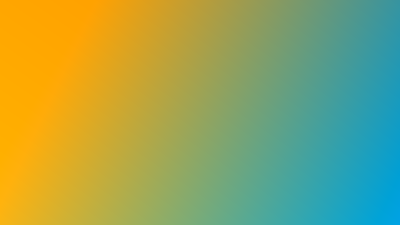

In [12]:
net2_im = NetImage(net2)
display(net2_im)
net2_im.save(".\\results\\net2_{}epochs.png".format(epochs))

### Net 3

A collection of linear regressors fed by logistic nodes

![net1](netdrawings\networks-net3.png)

In [13]:
# implementation and training
net3 = nn.NeuralNet(inps,outs,[5],[nn.SIGMOID,nn.LINEAR])
nn.TrainNet(net3,train,epochs,alpha)

Begining training
Starting epoch 10...
Starting epoch 20...
Starting epoch 30...
Starting epoch 40...
Starting epoch 50...
Starting epoch 60...
Starting epoch 70...
Starting epoch 80...
Starting epoch 90...
Done in 4.0 minutes and 48.29 seconds


In [14]:
net3_cost = nn.TestNet(net3,test)
print(net3_cost)

0.007532119274578397


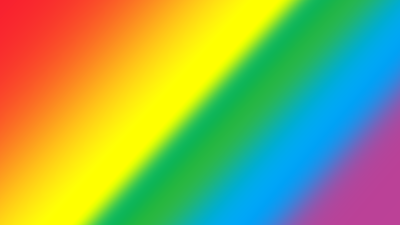

In [15]:
net3_im = NetImage(net3)
display(net3_im)
net3_im.save(".\\results\\net3_{}epochs.png".format(epochs))